# pre

In [ ]:
%pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Read the CSV
df = pd.read_csv('coords.csv')

# 2) Inspect first few rows
print("Head of the dataframe:")
print(df.head())

# 3) Check the structure of the dataframe
print("\nInfo about the dataframe:")
print(df.info())

# 4) Basic descriptive statistics
print("\nDescriptive statistics (for numeric columns):")
print(df.describe())

# 5) Check the class distribution
print("\nClass distribution:")
print(df['class'].value_counts())




Head of the dataframe:
       class   pose_x1   pose_y1   pose_z1   pose_v1   pose_x2   pose_y2  \
0  confident  0.545202  0.167053 -0.333581  0.999999  0.546981  0.140368   
1  confident  0.545752  0.168289 -0.288076  0.999999  0.549003  0.141969   
2  confident  0.545863  0.169316 -0.286774  0.999999  0.549641  0.142504   
3  confident  0.546727  0.169859 -0.309846  0.999999  0.552335  0.143076   
4  confident  0.548548  0.170505 -0.308721  0.999999  0.555048  0.144009   

    pose_z2   pose_v2   pose_x3  ...  left_z18  left_x19  left_y19  left_z19  \
0 -0.294268  0.999997  0.551289  ... -0.008447  0.825539  0.273088 -0.010109   
1 -0.251361  0.999997  0.553875  ... -0.007425  0.834632  0.284275 -0.008978   
2 -0.250720  0.999998  0.554754  ... -0.007300  0.834683  0.283583 -0.008644   
3 -0.272911  0.999998  0.557958  ... -0.006288  0.845715  0.296691 -0.007540   
4 -0.272524  0.999998  0.560622  ... -0.007535  0.846317  0.296364 -0.008827   

   left_x20  left_y20  left_z20  left_x

In [2]:
# 6) Check for missing values
missing_values = df.isnull().sum()
print("\nNumber of missing values per column:")
print(missing_values[missing_values > 0])

# 7) If you want to see how many rows have any missing values
rows_with_missing = df[df.isnull().any(axis=1)]
print(f"\nNumber of rows with at least one missing value: {len(rows_with_missing)}")




Number of missing values per column:
pose_x1       49
pose_y1       49
pose_z1       49
pose_v1       49
pose_x2       49
            ... 
left_y20    1064
left_z20    1064
left_x21    1064
left_y21    1064
left_z21    1064
Length: 2130, dtype: int64

Number of rows with at least one missing value: 1064


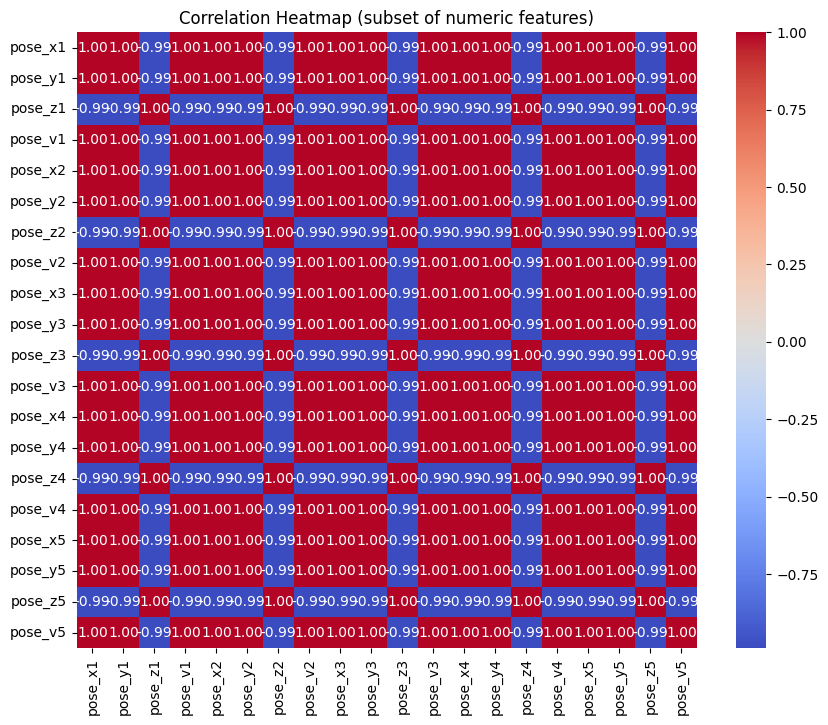

In [3]:
# 8) Quick correlation matrix among numeric features (excluding 'class')
#    NOTE: This might be a huge matrix, but you can still generate a summary or
#    subset. Here, let's do a subset for demonstration.
num_cols = df.select_dtypes(include=[np.number])  # numeric columns
subset_cols = num_cols.columns[:20]  # maybe just the first 20 numeric columns for demonstration
corr = num_cols[subset_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (subset of numeric features)")
plt.show()

# training

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pickle

# Load data
df = pd.read_csv('combined_coords.csv')

# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

# Handle missing values
#X = X.fillna(0)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Define pipelines
pipelines = {
    'lr': Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(max_iter=3000))
    ]),
    'rc': Pipeline([
        ('scaler', StandardScaler()),
        ('rc', RidgeClassifier())
    ]),
    'rf': Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier())
    ]),
    'gb': Pipeline([
        ('scaler', StandardScaler()),
        ('gb', GradientBoostingClassifier())
    ]),
}



In [2]:
import pickle
with open('selector.pkl', 'wb') as f:
    pickle.dump(selector, f)

In [ ]:
fit_models = {}

# Train each pipeline
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [ ]:
# Evaluate models
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(f"{algo} accuracy: {accuracy_score(y_test, yhat):.4f}")

In [ ]:
# Save the best model, e.g. RandomForest
with open('.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

In [ ]:
fit_models

In [2]:
import sklearn
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.6.1
